In [3]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.cm as cm
import time
import random

def line(data, x0, y0, x1, y1):
    pass

def BezierQuadBresenham(x0, y0, x1, y1, x2, y2):
    data=np.zeros((100,100,3), dtype = np.uint8)
    if x2>x1: #kierunek kroku w x
        sx=1
    else:
        sx=-1
    if y2>y0: #kierunek kroku w y
        sy=1
    else:
        sy=-1
    x=x0-2*x1+x2
    y=y0-2*y1+y2
    xy=2*x*y*sx*sy
    cur= sx*sy*(x*(y2-y0)-y*(x2-x0))/2 #krzywizna krzywej
    dx=(1-2*abs(x0-x1))*y*y+abs(y0-y1)*xy-2*cur*abs(y0-y2)
    dy=(1-2*abs(y0-y1))*x*x+abs(x0-x1)*xy+2*cur*abs(x0-x2)
    ex=(1-2*abs(x2-x1))*y*y+abs(y2-y1)*xy+2*cur*abs(y0-y2)
    ey=(1-2*abs(y2-y1))*x*x+abs(x2-x1)*xy-2*cur*abs(x0-x2)
    if((x0-x1)*(x2-x1)>0 or (y0-y1)*(y2-y1)>0):
        #print("a")
        return None
    if(cur==0):
        line(data, x0, y0, x2, y2)
        #print("b")
        return data
    x*=2*x
    y*=2*y
    if(cur<0):
        x=-x
        dx=-dx
        ex=-ex
        xy=-xy
        y=-y
        dy=-dy
        ey=-ey
    if(dx>=-y or dy<=-x or ex<=-y or ey>=-x):
        #print("c")
        x1=int((x0+4*x1+x2)/6)
        y1=int((y0+4*y1+y2)/6)
        line(data, x0, y0, x1, y1)
        line(data, x1, y1, x2, y2)
        return data;
    dx-=xy
    ex=dx+dy
    dy-=xy
    ii=0
    while(True):
        ii+=1
        if(ii%100==0):
            print(ii)
        data[x0][y0]=255
        ey=2*ex-dy
        if(2*ex>=dx):
            if(x0==x2):
                break
            x0+=sx
            dy-=xy
            dx+=y
            ex+=dx
        if(ey<=0):
            if(y0==y2):
                break
            y0+=sy
            dx-=xy
            dy+=x
            ex+=dy
    return data




#plt.imshow(data)

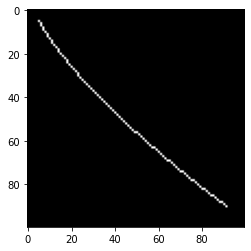

In [7]:
data=BezierQuadBresenham(5,5,40,25, 90, 91)
if not (data is None):
    plt.imshow(data)
else:
    print("błąd")